# Introduction

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. 


The first World Happiness Report has been published in 2012. That report was about the available global data on national happiness and reviewed related evidence from the emerging science of happiness, showing that the quality of people’s lives can be coherently, reliably, and validly assessed by a variety of subjective well-being measures, collectively referred to then and in subsequent reports as “happiness.” 

From then, each report includes updated evaluations to go deeper into the science of well-being, and on happiness. 

# Goal of the project

This notebook is about happiness in the world. The aim of this project is
to identify 

*   the regions/countries with the highest hapiness score
*   the features that have an impact on the hapiness score 

and to predict the hapiness score for 2018 based on a regression model.

# I. Datasets

In [1]:
# import dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go

In [0]:
# import dataframes
df_WHR = pd.read_excel("https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls")
df_TauxChomage = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/tauxchomage.csv")
df_TauxPauvrete = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/taux_pauvrete.csv")
df_TauxMortaliteInfantile = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/taux_mortalite_infantile.csv")
df_TauxSuicide = pd.read_csv("https://raw.githubusercontent.com/hackan98/DMML2019_Team_Nestle/master/data/tauxsuicide.csv")


### World Happiness Report

In [3]:
df_WHR.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_WHR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 26 columns):
Country name                                                1704 non-null object
Year                                                        1704 non-null int64
Life Ladder                                                 1704 non-null float64
Log GDP per capita                                          1676 non-null float64
Social support                                              1691 non-null float64
Healthy life expectancy at birth                            1676 non-null float64
Freedom to make life choices                                1675 non-null float64
Generosity                                                  1622 non-null float64
Perceptions of corruption                                   1608 non-null float64
Positive affect                                             1685 non-null float64
Negative affect                                             1691 non-null fl

# II. Cleaning Data

In [5]:
# Droping the features according the correlation
to_drop = [
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS round 2010-2014',]

df_WHR.drop(to_drop, inplace=True, axis=1)
df_WHR.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367


In [6]:
# Drop null data for world hapiness score dataset
df_WHR.dropna(inplace=True)
# Check if there are null for data for world hapiness score dataset
df_WHR.isnull().sum()

Country name                                         0
Year                                                 0
Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Healthy life expectancy at birth                     0
Freedom to make life choices                         0
Generosity                                           0
Perceptions of corruption                            0
Positive affect                                      0
Negative affect                                      0
Confidence in national government                    0
Democratic Quality                                   0
Delivery Quality                                     0
Standard deviation of ladder by country-year         0
Standard deviation/Mean of ladder by country-year    0
dtype: int64

In [7]:
df_WHR.shape

(1317, 16)

In [0]:
#Changing the colums name
df_WHR.columns = ['Country', 'Year','Happiness score','Economy(GDP per Capita)','Social support','Health(Life expectancy at birth)','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year']

In [9]:
#Check for the unique values of country names
unique = df_WHR['Country'].unique()
unique

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', '

In [0]:
#map of region according to countries
region={
'Afghanistan' : 'Asia-Pacific',
'Albania' : 'Eastern Europe',
'Algeria' : 'Africa',
'Angola' : 'Africa',
'Argentina' : 'Latin America',
'Armenia' : 'Asia-Pacific',
'Australia' : 'Asia-Pacific',
'Austria' : 'Western Europe',
'Azerbaijan' : 'Asia-Pacific',
'Bahrain' : 'Asia-Pacific',
'Bangladesh' : 'Asia-Pacific', 
'Belarus' : 'Eastern Europe', 
'Belgium' : 'Western Europe', 
'Belize' : 'Latin America', 
'Benin' : 'Africa', 
'Bhutan' : 'Asia-Pacific',
'Bolivia' : 'Latin America', 
'Bosnia and Herzegovina' : 'Eastern Europe', 
'Botswana' : 'Africa', 
'Brazil' : 'Latin America',
'Bulgaria' : 'Eastern Europe', 
'Burkina Faso' : 'Africa', 
'Burundi' : 'Africa', 
'Cambodia' : 'Asia-Pacific', 
'Cameroon' : 'Africa',
'Canada' : 'North America', 
'Central African Republic' : 'Africa', 
'Chad': 'Africa', 
'Chile' : 'Latin America', 
'China' : 'Asia-Pacific',
'Colombia' : 'Latin America', 
'Comoros' : 'Africa', 
'Congo (Brazzaville)' : 'Africa', 
'Congo (Kinshasa)' : 'Africa',
'Costa Rica' : 'Latin America', 
'Croatia' : 'Eastern Europe', 
'Cuba' : 'Latin America', 
'Cyprus' : 'Eastern Europe', 
'Czech Republic' : 'Western Europe',
'Denmark' : 'Western Europe', 
'Djibouti' : 'Africa', 
'Dominican Republic' : 'Latin America', 
'Ecuador' : 'Latin America', 
'Egypt' : 'Africa',
'El Salvador' : 'Latin America', 
'Estonia' : 'Eastern Europe', 
'Ethiopia' : 'Africa', 
'Finland' : 'Western Europe', 
'France' : 'Western Europe', 
'Gabon' : 'Africa',
'Gambia' : 'Africa', 
'Georgia' : 'Asia-Pacific', 
'Germany' : 'Western Europe', 
'Ghana' : 'Africa', 
'Greece' : 'Eastern Europe', 
'Guatemala' : 'Latin America',
'Guinea' : 'Africa', 
'Guyana' : 'Latin America', 
'Haiti' : 'Latin America', 
'Honduras' : 'Latin America',
'Hong Kong S.A.R. of China' : 'Asia-Pacific', 
'Hungary' : 'Eastern Europe', 
'Iceland' : 'Western Europe', 
'India' : 'Asia-Pacific',
'Indonesia' : 'Asia-Pacific', 
'Iran' : 'Asia-Pacific', 
'Iraq' : 'Asia-Pacific', 
'Ireland' : 'Western Europe', 
'Israel' : 'Asia-Pacific', 
'Italy' : 'Western Europe',
'Ivory Coast' : 'Africa', 
'Jamaica' : 'Africa', 
'Japan' : 'Asia-Pacific', 
'Jordan' : 'Asia-Pacific', 
'Kazakhstan' : 'Asia-Pacific', 
'Kenya' : 'Africa',
'Kosovo' : 'Eastern Europe', 
'Kuwait' : 'Asia-Pacific', 
'Kyrgyzstan' : 'Asia-Pacific', 
'Laos' : 'Asia-Pacific', 
'Latvia' : 'Eastern Europe', 
'Lebanon' : 'Asia-Pacific',
'Lesotho' : 'Africa', 
'Liberia' : 'Africa', 
'Libya' : 'Africa', 
'Lithuania' : 'Eastern Europe', 
'Luxembourg' : 'Western Europe',
'Macedonia' : 'Eastern Europe', 
'Madagascar' : 'Africa', 
'Malawi' : 'Africa', 
'Malaysia' : 'Asia-Pacific', 
'Mali' : 'Africa', 
'Malta' : 'Western Europe',
'Mauritania' : 'Africa', 
'Mauritius' : 'Africa', 
'Mexico' : 'Latin America', 
'Moldova' : 'Eastern Europe', 
'Mongolia' : 'Asia-Pacific',
'Montenegro' : 'Eastern Europe', 
'Morocco' : 'Africa', 
'Mozambique' : 'Africa', 
'Myanmar' : 'Asia-Pacific', 
'Namibia' : 'Africa',
'Nepal' : 'Asia-Pacific', 
'Netherlands' : 'Western Europe', 
'New Zealand' : 'Asia-Pacific', 
'Nicaragua' : 'Latin America', 
'Niger' : 'Africa',
'Nigeria' : 'Africa', 
'North Cyprus' : 'Eastern Europe', 
'Norway' : 'Western Europe', 
'Oman' : 'Asia-Pacific', 
'Pakistan' : 'Asia-Pacific',
'Palestinian Territories': 'Asia-Pacific', 
'Panama' : 'Latin America', 
'Paraguay' : 'Latin America', 
'Peru' : 'Latin America',
'Philippines' : 'Asia-Pacific', 
'Poland' : 'Eastern Europe', 
'Portugal' : 'Western Europe', 
'Qatar' : 'Asia-Pacific', 
'Romania' : 'Eastern Europe',
'Russia' : 'Eastern Europe',
'Rwanda' : 'Africa', 
'Saudi Arabia' : 'Asia-Pacific', 
'Senegal' : 'Africa', 
'Serbia' : 'Eastern Europe', 
'Sierra Leone' : 'Africa',
'Singapore' : 'Asia-Pacific', 
'Slovakia' : 'Eastern Europe', 
'Slovenia' : 'Eastern Europe', 
'Somalia' : 'Africa',
'Somaliland region' : 'Africa', 
'South Africa' : 'Africa', 
'South Korea' : 'Asia-Pacific', 
'South Sudan' : 'Africa',
'Spain' : 'Western Europe', 
'Sri Lanka' : 'Asia-Pacific', 
'Sudan' : 'Africa', 
'Suriname' : 'Latin America', 
'Swaziland' : 'Africa', 
'Sweden' : 'Western Europe',
'Switzerland' : 'Western Europe', 
'Syria' : 'Asia-Pacific', 
'Taiwan Province of China' : 'Asia-Pacific', 
'Tajikistan' : 'Asia-Pacific',
'Tanzania' : 'Africa', 
'Thailand' : 'Asia-Pacific', 
'Togo' : 'Africa', 
'Trinidad and Tobago' : 'Latin America', 
'Tunisia' : 'Africa',
'Turkey' : 'Asia-Pacific', 
'Turkmenistan' : 'Asia-Pacific', 
'Uganda' : 'Africa', 
'Ukraine' : 'Eastern Europe',
'United Arab Emirates' : 'Asia-Pacific', 
'United Kingdom' : 'Western Europe', 
'United States' : 'North America',
'Uruguay' : 'Latin America', 
'Uzbekistan' : 'Asia-Pacific', 
'Venezuela' : 'Latin America', 
'Vietnam' : 'Asia-Pacific', 
'Yemen' : 'Asia-Pacific', 
'Zambia' : 'Africa',
'Zimbabwe' : 'Africa'
}

In [11]:
#Add Region column to the main dataframe
df_WHR['Region'] = df_WHR['Country'].map(region)
df_WHR.head()

,Country,Year,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,Asia-Pacific
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,Asia-Pacific
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,Asia-Pacific
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,Asia-Pacific
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,Asia-Pacific


### Unemployement rate 

In [12]:
# The value represents the percentage of the active poplulation
df_TauxChomage.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,UNEMP,TOT,PC_LF,A,2006,4.785240,NaN
1,AUS,UNEMP,TOT,PC_LF,A,2007,4.379151,NaN
2,AUS,UNEMP,TOT,PC_LF,A,2008,4.234330,NaN
3,AUS,UNEMP,TOT,PC_LF,A,2009,5.560385,NaN
4,AUS,UNEMP,TOT,PC_LF,A,2010,5.213340,NaN


In [13]:
#here we check the unique country codes in the dataframe
unique_country_code1 = df_TauxChomage.LOCATION.unique()
unique_country_code1

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'EST', 'IDN', 'ISR', 'RUS',
       'SVN', 'ZAF', 'EU28', 'OECD', 'EA19', 'COL', 'LVA', 'LTU'],
      dtype=object)

In [0]:
#we create a map of the country codes and assign the country name
country1={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'JPN':'Japan',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania'
}

### Poverty rate 

In [0]:
df_TauxChomage['Country'] = df_TauxChomage['LOCATION'].map(country1)

In [16]:
#keep only the colums we want to work with
to_drop = ['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_TauxChomage.drop(to_drop, inplace=True, axis=1)
df_TauxChomage.head()

,TIME,Value,Country
0,2006,4.785240,Australia
1,2007,4.379151,Australia
2,2008,4.234330,Australia
3,2009,5.560385,Australia
4,2010,5.213340,Australia


In [17]:
df_TauxChomage.columns = ['Year','Value Unemployement rate','Country']
df_TauxChomage.head()

,Year,Value Unemployement rate,Country
0,2006,4.785240,Australia
1,2007,4.379151,Australia
2,2008,4.234330,Australia
3,2009,5.560385,Australia
4,2010,5.213340,Australia


In [18]:
# Drop null data for Unemployement rate  dataset
df_TauxChomage.dropna(inplace=True)
# Check if there are null for data for Unemployement rate  dataset
df_TauxChomage.isnull().sum()

Year                        0
Value Unemployement rate    0
Country                     0
dtype: int64

In [19]:
# The value represents The poverty rate corresponds to the proportion of people
#  whose income is below the poverty line, i.e. half of the median income of the total population
df_TauxPauvrete.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POVERTY,TOT,RT,A,2012,0.140,NaN
1,AUS,POVERTY,TOT,RT,A,2014,0.128,NaN
2,AUS,POVERTY,TOT,RT,A,2016,0.121,NaN
3,AUT,POVERTY,TOT,RT,A,2007,0.097,NaN
4,AUT,POVERTY,TOT,RT,A,2008,0.092,NaN


In [20]:
unique_country_code2 = df_TauxPauvrete.LOCATION.unique()
unique_country_code2

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'KOR', 'LUX', 'MEX', 'NLD',
       'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA', 'EST', 'ISR', 'SVN', 'JPN', 'CHL', 'LVA', 'LTU',
       'BRA', 'CHN', 'IND', 'RUS', 'ZAF', 'CRI'], dtype=object)

In [0]:
country2={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'JPN':'Japan',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania',
'CRI':'Costa rica',
'IND':'India',
'CHN':'China'
}

In [22]:
df_TauxPauvrete['COUNTRY'] = df_TauxPauvrete['LOCATION'].map(country2)
df_TauxPauvrete.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,COUNTRY
0,AUS,POVERTY,TOT,RT,A,2012,0.140,NaN,Australia
1,AUS,POVERTY,TOT,RT,A,2014,0.128,NaN,Australia
2,AUS,POVERTY,TOT,RT,A,2016,0.121,NaN,Australia
3,AUT,POVERTY,TOT,RT,A,2007,0.097,NaN,Austria
4,AUT,POVERTY,TOT,RT,A,2008,0.092,NaN,Austria


In [23]:
to_drop = ['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes','LOCATION']
df_TauxPauvrete.drop(to_drop, inplace=True, axis=1)
df_TauxPauvrete.head()

,TIME,Value,COUNTRY
0,2012,0.140,Australia
1,2014,0.128,Australia
2,2016,0.121,Australia
3,2007,0.097,Austria
4,2008,0.092,Austria


In [24]:
df_TauxPauvrete.columns = ['Year','Value Poverty rate','Country']
df_TauxPauvrete.head()

,Year,Value Poverty rate,Country
0,2012,0.140,Australia
1,2014,0.128,Australia
2,2016,0.121,Australia
3,2007,0.097,Austria
4,2008,0.092,Austria


In [25]:
# Drop null data for Poverty rate  dataset
df_TauxPauvrete.dropna(inplace=True)
# Check if there are null for data for Poverty rate dataset
df_TauxPauvrete.isnull().sum()

Year                  0
Value Poverty rate    0
Country               0
dtype: int64

### Child mortality rate

In [26]:
# The value represents the number of deaths per 1000 live births
df_TauxMortaliteInfantile.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2006,4.7,NaN
1,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2007,4.1,NaN
2,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2008,4.1,NaN
3,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2009,4.2,NaN
4,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2010,4.1,NaN


In [27]:
unique_country_code3 = df_TauxMortaliteInfantile.LOCATION.unique()
unique_country_code3

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'IDN',
       'ISR', 'RUS', 'SVN', 'ZAF', 'COL', 'LVA', 'LTU', 'CRI'],
      dtype=object)

In [0]:
country3={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'JPN':'Japan',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania',
'CRI':'Costa rica',
'IND':'India',
'CHN':'China'
}

In [29]:
df_TauxMortaliteInfantile['COUNTRY'] = df_TauxMortaliteInfantile['LOCATION'].map(country3)
df_TauxMortaliteInfantile.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,COUNTRY
0,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2006,4.7,NaN,Australia
1,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2007,4.1,NaN,Australia
2,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2008,4.1,NaN,Australia
3,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2009,4.2,NaN,Australia
4,AUS,INFANTMORTALITY,TOT,DEATH_1000BIRTH,A,2010,4.1,NaN,Australia


In [30]:
to_drop = ['LOCATION','INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_TauxMortaliteInfantile.drop(to_drop, inplace=True, axis=1)
df_TauxMortaliteInfantile.head()

,TIME,Value,COUNTRY
0,2006,4.7,Australia
1,2007,4.1,Australia
2,2008,4.1,Australia
3,2009,4.2,Australia
4,2010,4.1,Australia


In [31]:
df_TauxMortaliteInfantile.columns = ['Year','Value Child mortality rate','Country']
df_TauxMortaliteInfantile.head()

,Year,Value Child mortality rate,Country
0,2006,4.7,Australia
1,2007,4.1,Australia
2,2008,4.1,Australia
3,2009,4.2,Australia
4,2010,4.1,Australia


In [32]:
# Drop null data for Child mortality rate  dataset
df_TauxMortaliteInfantile.dropna(inplace=True)
# Check if there are null for Child mortality rate dataset
df_TauxMortaliteInfantile.isnull().sum()

Year                          0
Value Child mortality rate    0
Country                       0
dtype: int64

### Suicide rate

In [33]:
#The value represents the number of deaths per 100,000
df_TauxSuicide.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,2006,10.5,NaN
1,AUS,SUICIDE,TOT,100000PER,A,2007,10.6,NaN
2,AUS,SUICIDE,TOT,100000PER,A,2008,10.9,NaN
3,AUS,SUICIDE,TOT,100000PER,A,2009,10.7,NaN
4,AUS,SUICIDE,TOT,100000PER,A,2010,10.9,NaN


In [34]:
unique_country_code4 = df_TauxSuicide.LOCATION.unique()
unique_country_code4

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'GBR', 'USA', 'BRA', 'CHL', 'EST', 'ISR', 'RUS', 'SVN', 'ZAF',
       'TUR', 'COL', 'LVA', 'LTU', 'CRI'], dtype=object)

In [0]:
country4={
'AUS':'Australia',
'AUT':'Austria',
'BEL':'Belgium',
'CAN':'Canada',
'CZE':'Czech Republic',
'DNK':'Denmark',
'FIN':'Finland',
'FRA':'France',
'DEU':'Germany',
'GRC':'Greece',
'HUN':'Hungary',
'ISL':'Iceland',
'IRL':'Ireland',
'ITA':'Italy',
'KOR':'Korea',
'LUX':'Luxembourg',
'MEX':'Mexico',
'NLD':'Netherlands',
'NZL':'New Zealand',
'NOR':'Norway',
'POL':'Poland',
'PRT':'Puerto Rico',
'SVK':'Slovakia',
'ESP':'Spain',
'SWE':'Sweden',
'CHE':'Switzerland',
'TUR':'Turkey',
'GBR':'United Kingdom',
'USA':'United States',
'BRA':'Brasil',
'CHL': 'Chile',
'EST':'Estonia',
'IDN':'Indonesia',
'ISR':'Israel',
'RUS':'Russia',
'SVN':'Slovenia',
'JPN':'Japan',
'ZAF':'South Africa',
'COL':'Colombia',
'LVA':'Latvia',
'LTU':'Lithuania',
'CRI':'Costa rica',
'IND':'India',
'CHN':'China'
}

In [36]:
df_TauxSuicide['COUNTRY'] = df_TauxSuicide['LOCATION'].map(country4)
df_TauxSuicide.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,COUNTRY
0,AUS,SUICIDE,TOT,100000PER,A,2006,10.5,NaN,Australia
1,AUS,SUICIDE,TOT,100000PER,A,2007,10.6,NaN,Australia
2,AUS,SUICIDE,TOT,100000PER,A,2008,10.9,NaN,Australia
3,AUS,SUICIDE,TOT,100000PER,A,2009,10.7,NaN,Australia
4,AUS,SUICIDE,TOT,100000PER,A,2010,10.9,NaN,Australia


In [37]:
to_drop = ['LOCATION','INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']
df_TauxSuicide.drop(to_drop, inplace=True, axis=1)
df_TauxSuicide.head()

,TIME,Value,COUNTRY
0,2006,10.5,Australia
1,2007,10.6,Australia
2,2008,10.9,Australia
3,2009,10.7,Australia
4,2010,10.9,Australia


In [38]:
df_TauxSuicide.columns = ['Year','Value Suicide rate','Country']
df_TauxSuicide.head()

,Year,Value Suicide rate,Country
0,2006,10.5,Australia
1,2007,10.6,Australia
2,2008,10.9,Australia
3,2009,10.7,Australia
4,2010,10.9,Australia


In [39]:
# Drop null data for Child mortality rate  dataset
df_TauxSuicide.dropna(inplace=True)
# Check if there are null for Child mortality rate dataset
df_TauxSuicide.isnull().sum()

Year                  0
Value Suicide rate    0
Country               0
dtype: int64

## Merge of main dataset with other ones

In [40]:
# Merge the unemployment and poverty rate datasets
df1_merge = pd.merge(df_TauxChomage, df_TauxPauvrete)
df1_merge.head()

,Year,Value Unemployement rate,Country,Value Poverty rate
0,2012,5.223376,Australia,0.140
1,2014,6.077244,Australia,0.128
2,2016,5.710301,Australia,0.121
3,2007,4.858952,Austria,0.097
4,2008,4.129104,Austria,0.092


In [41]:
# Merge with the child mortality rate dataset
df2_merge = pd.merge(df1_merge, df_TauxMortaliteInfantile)
df2_merge.head()

,Year,Value Unemployement rate,Country,Value Poverty rate,Value Child mortality rate
0,2012,5.223376,Australia,0.140,3.3
1,2014,6.077244,Australia,0.128,3.4
2,2016,5.710301,Australia,0.121,3.1
3,2007,4.858952,Austria,0.097,3.7
4,2008,4.129104,Austria,0.092,3.7


In [42]:
# Merge with the suicide rate dataset
df3_merge = pd.merge(df2_merge, df_TauxSuicide)
df3_merge.head()

,Year,Value Unemployement rate,Country,Value Poverty rate,Value Child mortality rate,Value Suicide rate
0,2012,5.223376,Australia,0.140,3.3,11.4
1,2014,6.077244,Australia,0.128,3.4,12.5
2,2016,5.710301,Australia,0.121,3.1,11.9
3,2007,4.858952,Austria,0.097,3.7,14.6
4,2008,4.129104,Austria,0.092,3.7,14.1


In [43]:
# Merge with the world happiness dataset
df4_merge_WHR = pd.merge(df3_merge, df_WHR)
df4_merge_WHR.head()

,Year,Value Unemployement rate,Country,Value Poverty rate,Value Child mortality rate,Value Suicide rate,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
0,2012,5.223376,Australia,0.140,3.3,11.4,7.195586,10.663229,0.944599,72.400002,0.935146,0.265169,0.368252,0.810742,0.214397,0.420419,1.248594,1.790157,1.761226,0.244765,Asia-Pacific
1,2014,6.077244,Australia,0.128,3.4,12.5,7.288550,10.681601,0.923799,72.599998,0.922932,0.310035,0.442021,0.775210,0.245304,0.464676,1.196954,1.811844,1.795415,0.246334,Asia-Pacific
2,2016,5.710301,Australia,0.121,3.1,11.9,7.250080,10.703098,0.942334,73.000000,0.922316,0.229793,0.398545,0.790868,0.236086,0.452732,1.199454,1.759353,1.698828,0.234318,Asia-Pacific
3,2008,4.129104,Austria,0.092,3.7,14.1,7.180954,10.701936,0.934593,71.080002,0.879069,0.289452,0.613625,0.832170,0.173195,0.257242,1.348835,1.788303,1.693995,0.235901,Western Europe
4,2010,4.821680,Austria,0.089,3.9,13.9,7.302679,10.676744,0.914193,71.400002,0.895980,0.129112,0.546145,0.814719,0.155793,0.486447,1.291470,1.670085,1.753248,0.240083,Western Europe


# III. Regions/Countries with the highest hapiness score

### Regions sorted by Happiness Score

In [44]:
df_WHR_perYear=df_WHR[df_WHR["Year"]==2017].sort_values("Year", ascending=False)
df_WHR_perYear.head()

,Country,Year,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
9,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808,1.454051,0.546283,Asia-Pacific
842,Latvia,2017,5.977818,10.129182,0.895099,66.500000,0.699520,-0.158590,0.798378,0.623313,0.231753,0.264001,0.628388,0.881661,1.814803,0.303590,Eastern Europe
1203,Peru,2017,5.710937,9.412195,0.830123,67.800003,0.826552,-0.163864,0.895384,0.789391,0.393874,0.254595,0.008479,-0.176698,2.594314,0.454271,Latin America
1191,Paraguay,2017,5.713295,9.085571,0.902043,65.500000,0.891171,0.018430,0.809901,0.902772,0.231784,0.381784,0.037548,-0.604875,2.428467,0.425055,Latin America
1178,Panama,2017,6.567659,10.010862,0.911905,69.500000,0.899574,-0.160124,0.840777,0.832689,0.242319,0.390996,0.455258,-0.026318,2.677188,0.407632,Latin America


In [45]:
df_WHR_perYear.groupby('Region')['Happiness score','Economy(GDP per Capita)','Social support','Health(Life expectancy at birth)','Freedom to make life choices'].mean().sort_values(by="Happiness score", ascending=False)


,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices
Region,,,,,
North America,7.203314,10.796625,0.927376,70.900002,0.906821
Western Europe,7.022026,10.714011,0.928008,72.478947,0.877924
Latin America,6.007782,9.319767,0.859880,66.480000,0.831348
Eastern Europe,5.578305,9.812188,0.848848,67.594253,0.706560
Asia-Pacific,5.318753,9.339006,0.797304,65.343577,0.798412
Africa,4.430116,7.932526,0.693451,55.402703,0.743147


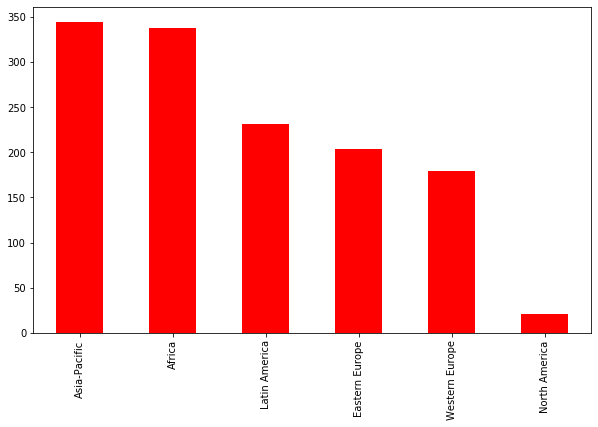

In [46]:

plt.figure(figsize=(10,6))
list = df_WHR.sort_values(by=['Happiness score'],ascending=True)['Region'].value_counts()
list.plot(kind = 'bar', color = 'red')

In [0]:
# DF ordered by the feature "life ladder" 
Ranking=df_WHR_perYear.sort_values(by="Happiness score", ascending=False).head(10)

[Text(0, 0.5, 'Happiness Score'), Text(0.5, 0, 'Country')]

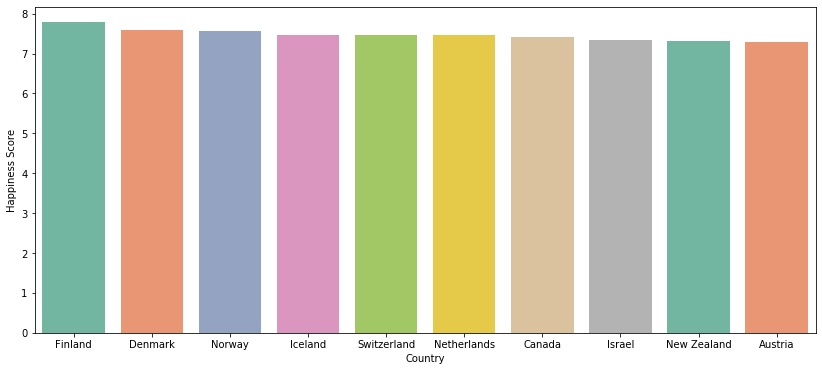

In [48]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x='Country',y='Happiness score', data=Ranking, palette = 'Set2')
ax.set(xlabel='Country', ylabel='Happiness Score')

##Europe vs Asia

# IV. Features impact on the hapiness score 

### Features correlation with the Hapiness score

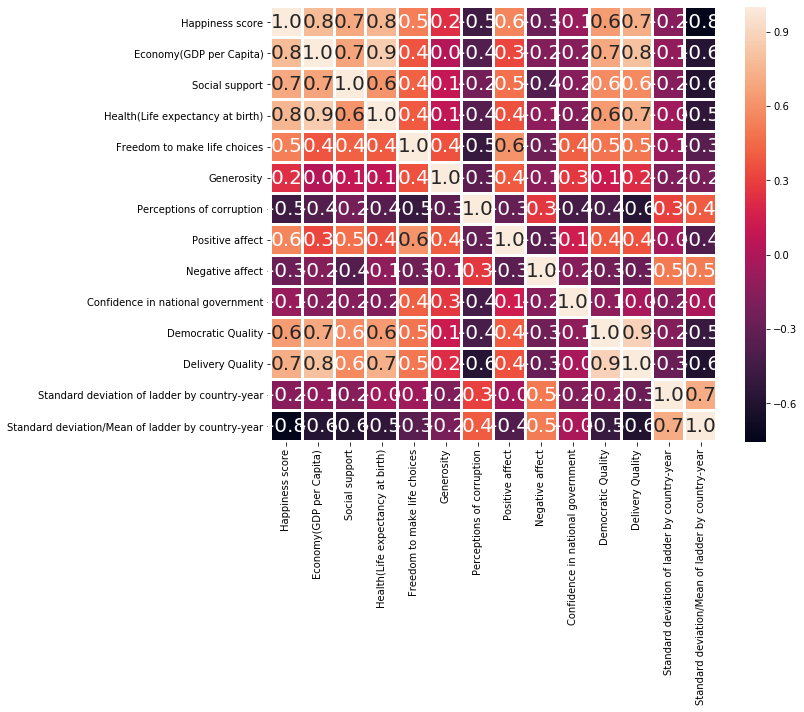

In [49]:
plt.figure(figsize=(10,8))
corr = df_WHR.drop(['Country','Region','Year'],axis = 1).corr()
sns.heatmap(corr, cbar = True, annot=True, linewidths = 2, fmt='.1f',annot_kws={'size': 20}) 


We can see that the Hapiness score is highly correlated with economy, social support and delivery quality.

### Correlation plots with most impacting features

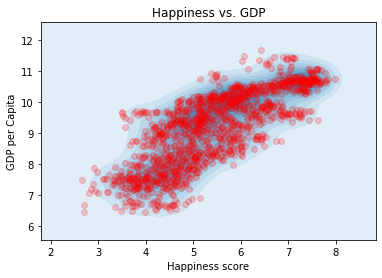

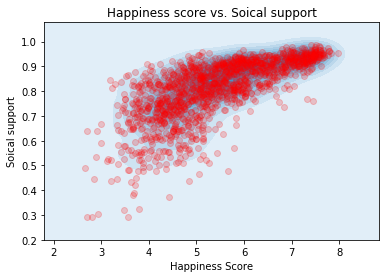

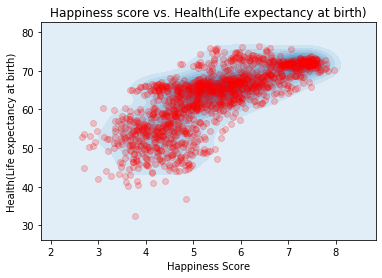

In [50]:
sns.kdeplot(df_WHR['Happiness score'], df_WHR['Economy(GDP per Capita)'], shade=True)
plt.scatter(df_WHR['Happiness score'], df_WHR['Economy(GDP per Capita)'], alpha=0.2, color='red')
plt.xlabel('Happiness score')
plt.ylabel('GDP per Capita')
plt.title('Happiness vs. GDP')
plt.show()


sns.kdeplot(df_WHR['Happiness score'], df_WHR['Social support'], shade=True)
plt.scatter(df_WHR['Happiness score'], df_WHR['Social support'], alpha=0.2, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Soical support')
plt.title('Happiness score vs. Soical support')
plt.show()


sns.kdeplot(df_WHR['Happiness score'], df_WHR['Health(Life expectancy at birth)'], shade=True)
plt.scatter(df_WHR['Happiness score'], df_WHR['Health(Life expectancy at birth)'], alpha=0.2, color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Health(Life expectancy at birth)')
plt.title('Happiness score vs. Health(Life expectancy at birth)')
plt.show()

<Figure size 864x864 with 0 Axes>

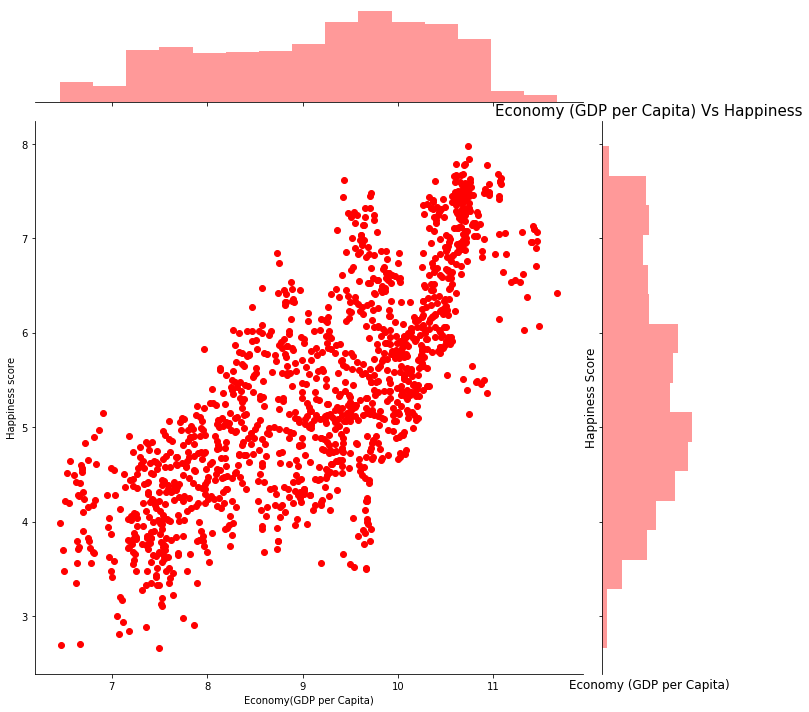

In [51]:
#Jointplot for Happiness score and GDP 

plt.figure(figsize=(12,12))
sns.jointplot(x = 'Economy(GDP per Capita)', y = 'Happiness score', data = df_WHR, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Economy (GDP per Capita)', fontsize=12)
plt.title('Economy (GDP per Capita) Vs Happiness', fontsize=15)
plt.show()

We can see when the `GDP` __increase__, the`happiness score` __increase__ too.

<Figure size 864x864 with 0 Axes>

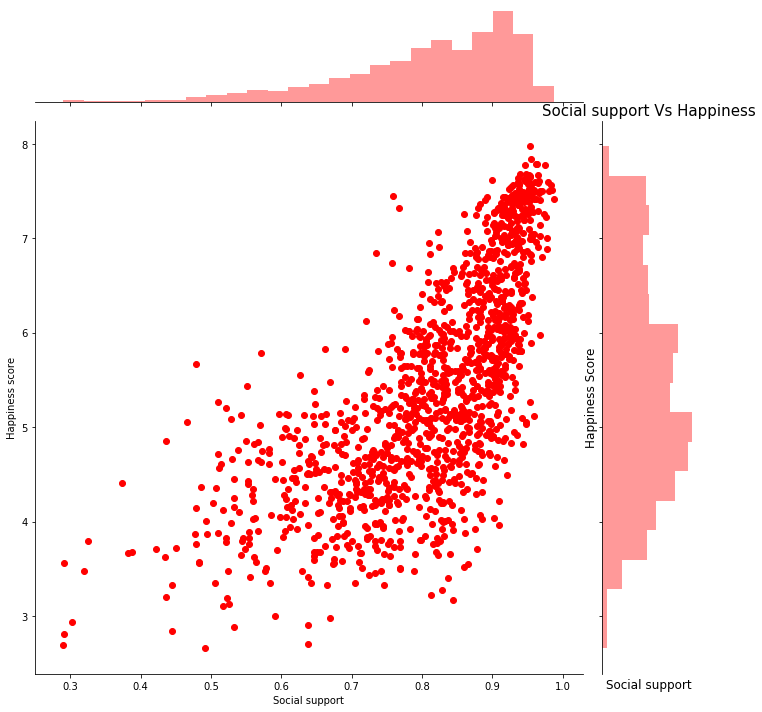

In [52]:
#Jointplot for Happiness score and Social support

plt.figure(figsize=(12,12))
sns.jointplot(x = 'Social support', y = 'Happiness score', data = df_WHR, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Social support', fontsize=12)
plt.title('Social support Vs Happiness', fontsize=15)
plt.show()

We can see that when the `social score` __increase__, the `happiness score` __increase__ too.

<Figure size 864x864 with 0 Axes>

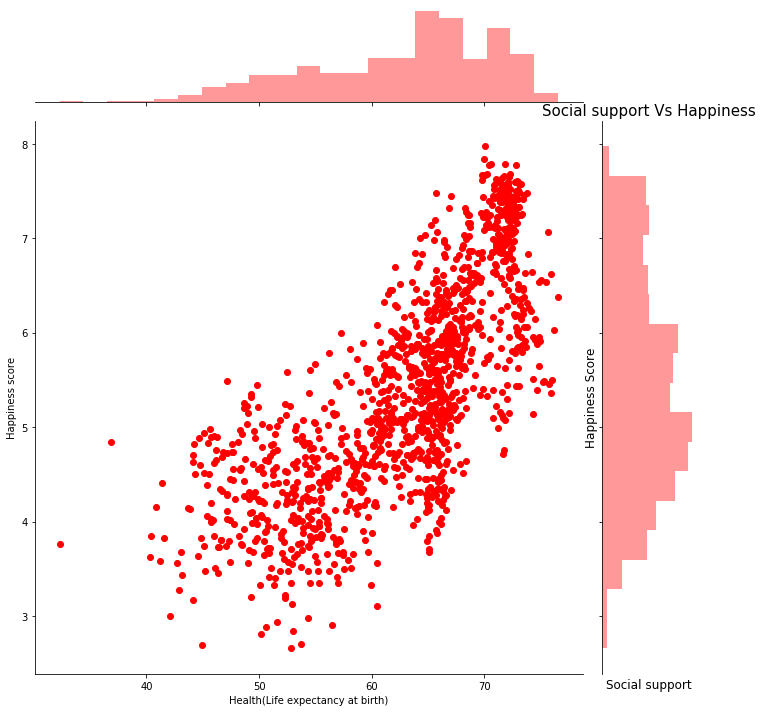

In [53]:
#Jointplot for Happiness score and Social support

plt.figure(figsize=(12,12))
sns.jointplot(x = 'Health(Life expectancy at birth)', y = 'Happiness score', data = df_WHR, height=10, color='red')
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Social support', fontsize=12)
plt.title('Social support Vs Happiness', fontsize=15)
plt.show()

## Linear regression with most impacting features

We decided to do first the **linear regression** with:


*   Happiness score and the economic feature which is Economy(GDP per Capita)
*   Happiness score and the social feature which is Social support
*   Happiness score and the health feature that Health(Life expectancy at birth9



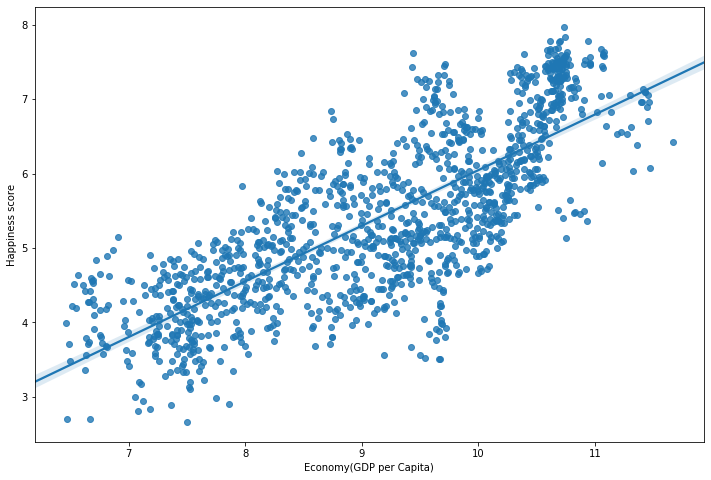

In [54]:
plt.figure(figsize=(12,8))
sns.regplot(x='Economy(GDP per Capita)',y='Happiness score' ,data=df_WHR)

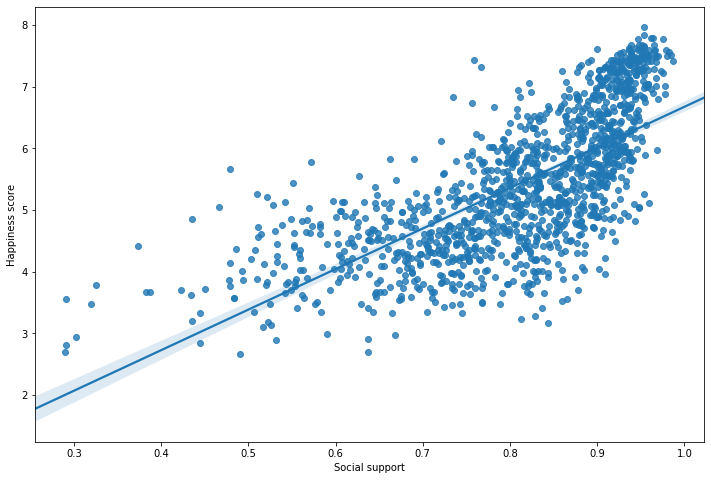

In [55]:
plt.figure(figsize=(12,8))
sns.regplot(x='Social support',y='Happiness score' ,data=df_WHR)

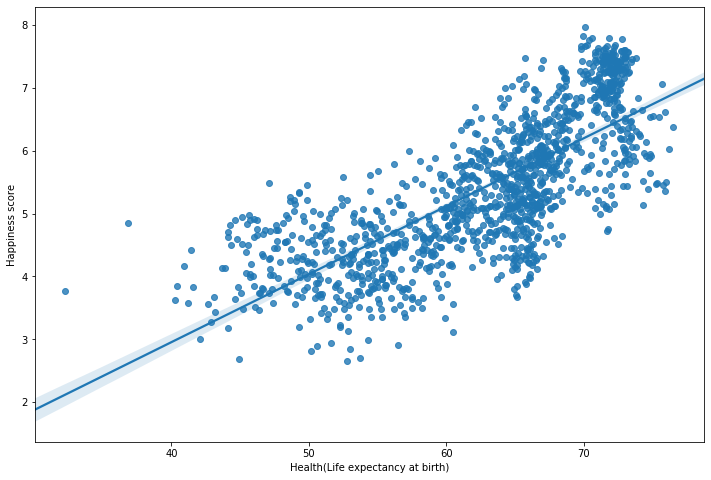

In [56]:
plt.figure(figsize=(12,8))
sns.regplot(x='Health(Life expectancy at birth)',y='Happiness score' ,data=df_WHR)

Then we decided to also do the **linear regression** with all the other features of the main dataset. 

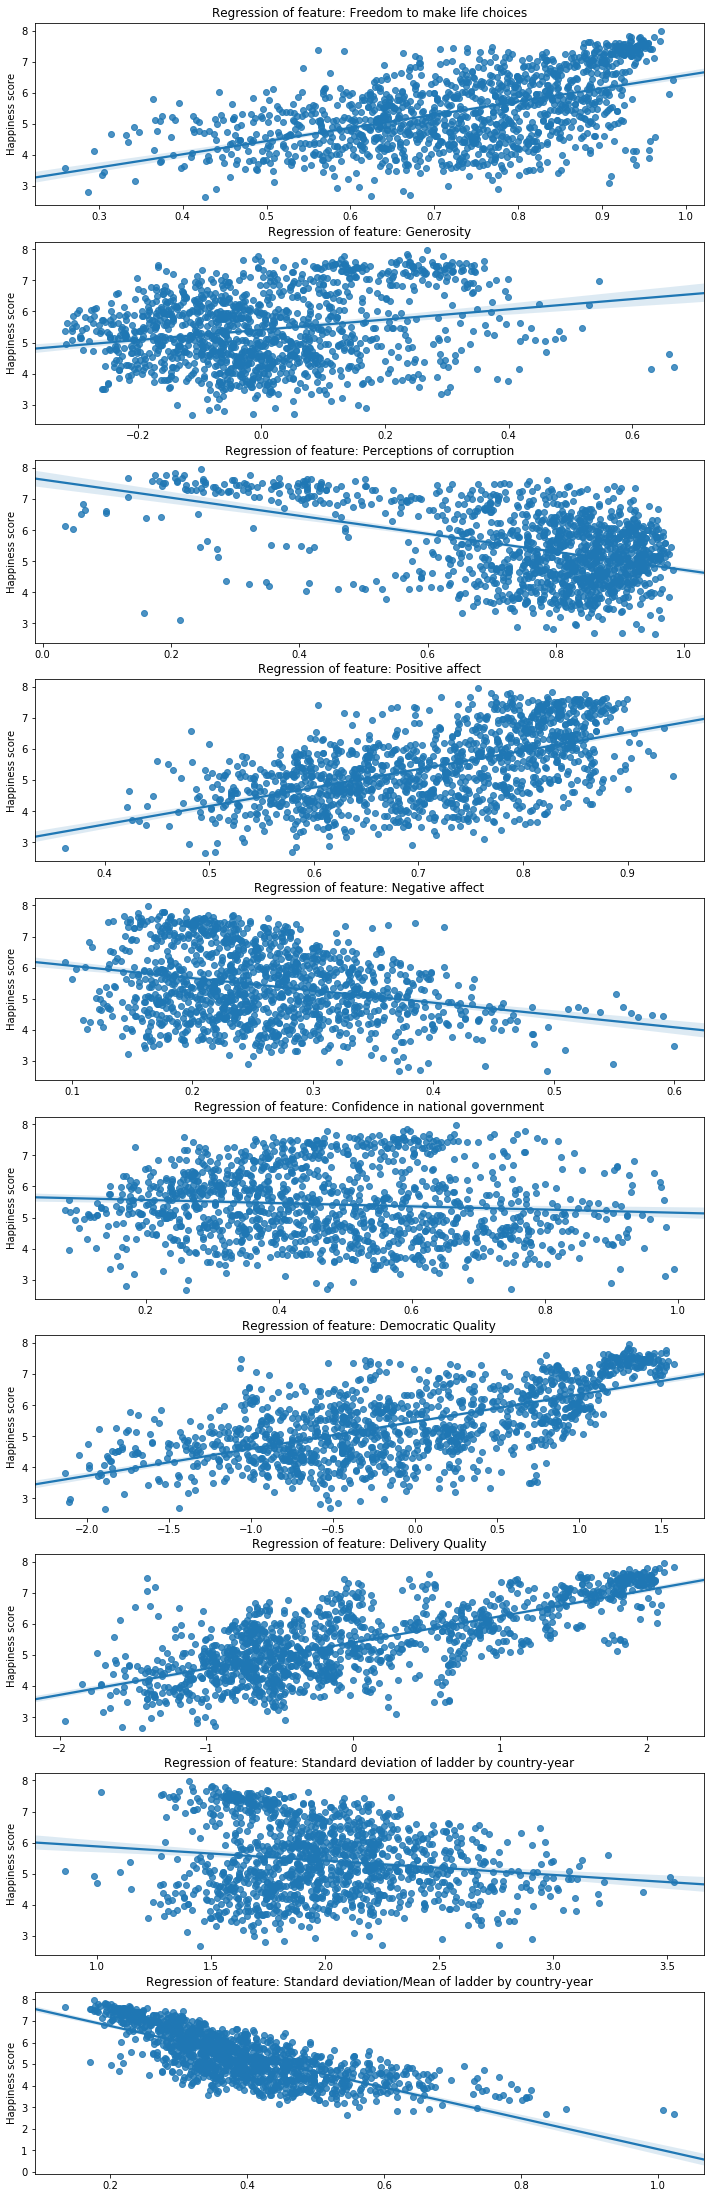

In [57]:
cols = ['Freedom to make life choices', 'Generosity','Perceptions of corruption','Positive affect',
        'Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year',
        'Standard deviation/Mean of ladder by country-year']
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cols):
    ax = plt.subplot(gs[i])
    #sns.distplot(df1[cn], bins=50)
    sns.regplot(x=df_WHR[cn],y='Happiness score' ,data=df_WHR)
    ax.set_xlabel('')
    ax.set_title('Regression of feature: ' + str(cn))
plt.show()

# V. Construction of a model for predicting happiness 

# Regression model on main dataset

Here we will examine if we can predict the __happiness score__ given some of the features. 

## Linear Regression model with train/test split

First, Let's choose our features __X__ and our target value __y__

In [0]:
#here our target value for y is the happiness score
#for the features we take all the columns that have an impact on happiness score and remove country name, region etc 
X = df_WHR.drop(['Country', 'Year', 'Happiness score', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'Region'], axis=1)
y = df_WHR['Happiness score']

__Important!__ 

__For all the questions below, We will use a `test size` of 0.2 and the `seed of random generators` will be 72.__

Now we are going to __Specify__ and __Fit__ the Model

We also __standardize__ the features in order to use them in the `regressions`

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Standardized features\n')
print(str(X_train[:4]))

Standardized features

[[-1.43399812 -2.69413176 -2.4003976  -3.03484574 -0.20999597  0.63709002
  -0.90720224 -0.20477655 -1.30732302 -1.86885932 -1.44743763]
 [ 1.91127442  0.86954148  0.13947446  0.26604235 -1.70491807 -2.29209266
   1.20684705 -1.00116201  1.64655143 -0.03719163  0.35677271]
 [ 1.188091    1.03442798  1.00778573  0.77797653  0.48593293 -0.35963822
   0.73162985 -1.00029159 -0.44268399  1.28146926  1.60297514]
 [-0.8985694   0.83248771  0.08192082  0.57818687  0.40325653  0.86969052
   0.59033771 -1.71203683  0.24035859 -0.55903818 -0.86681652]]


Then we create a **LinearRegression** model and fit it to the relevant data.

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

### Difference between predictions and actual results

In [62]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
515,4.782383,5.156990,-0.374607
136,7.103661,6.717664,0.385998
1224,5.746132,6.199710,-0.453578
375,6.237958,6.404292,-0.166334
1571,5.057561,4.720710,0.336852


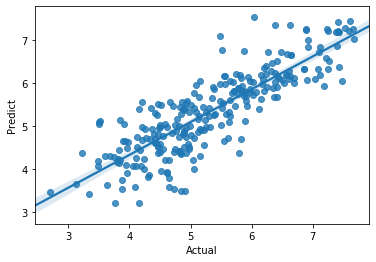

In [63]:
sns.regplot(x='Actual',y='Predict',data=result_lm)

### Errors rate calculation

We wanted to verify the accuracy of our predictions by calculating the **mean absolute error** the **mean squared error** and also the **root-mean-squared deviation**

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.4560380035683678
MSE: 0.3382853624236843
RMSE: 0.5816230415171706


## Random Forest Regression

We also decided to do a **random forest regression** and we'll try to see which method has the best accuracy with the predictions.

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



### Difference between predictions and actual results

In [66]:
result_rf = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_rf['Diff'] = y_test - y_pred
result_rf.head()

,Actual,Predict,Diff
515,4.782383,5.002932,-0.220549
136,7.103661,7.000421,0.103240
1224,5.746132,5.981959,-0.235827
375,6.237958,6.830734,-0.592775
1571,5.057561,4.633797,0.423764


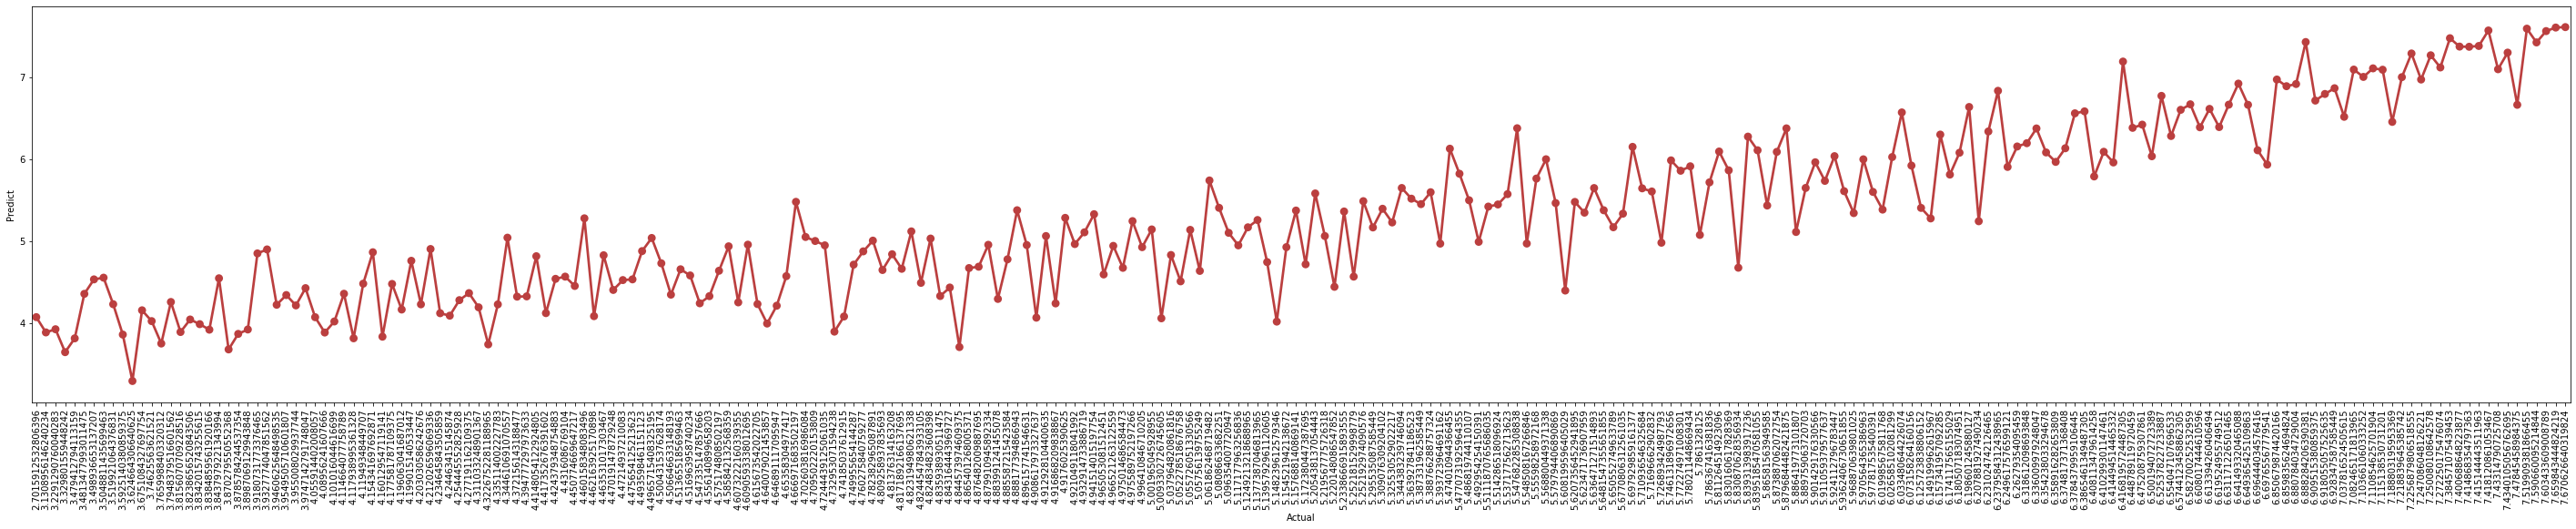

In [67]:
plt.figure (figsize = (50, 8))
sns.pointplot(x='Actual',y='Predict',data=result_rf, dodge = True, color="#bb3f3f")
plt.xticks(rotation = 90)
plt.show()

### Errors rate calculation

We wanted to verify the accuracy of our predictions by calculating the **mean absolute error** the **mean squared error** and also the **root-mean-squared deviation**

In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3129369369867388
MSE: 0.17497353833359258
RMSE: 0.4182983843306027


We can clearly see that **random forest regression** method has generated less error than **linear regression** regarding the predictions.

# Regression model with new features from linked datasets

Here we will try to do predictions after merging with the main dataset other datasets values which are the following ones: 
    
*   Suicide rate
*   Unemployment rate
*   Child mortality rate
*   Poverty rate
                                                    

We will compare the __new predictions__ to see if we are able to be more accurate and precise with these __new values__ added.

## Linear Regression model with train/test split

In [0]:
#here our target value for y is the happiness score
#for the features we take all the columns that have an impact on happiness score and remove country name, region etc
#we also take the feautures provided by the other datasets that we linked to ours (Suicide rate, Unemployment rate, Child mortality rate, Poverty rate)
X2 = df4_merge_WHR.drop(['Country', 'Year', 'Happiness score','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year', 'Region'], axis=1)
y2 = df4_merge_WHR['Happiness score']

In [70]:
X2.head()


,Value Unemployement rate,Value Poverty rate,Value Child mortality rate,Value Suicide rate,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,5.223376,0.140,3.3,11.4,10.663229,0.944599,72.400002,0.935146,0.265169,0.368252,0.810742,0.214397,0.420419,1.248594,1.790157
1,6.077244,0.128,3.4,12.5,10.681601,0.923799,72.599998,0.922932,0.310035,0.442021,0.775210,0.245304,0.464676,1.196954,1.811844
2,5.710301,0.121,3.1,11.9,10.703098,0.942334,73.000000,0.922316,0.229793,0.398545,0.790868,0.236086,0.452732,1.199454,1.759353
3,4.129104,0.092,3.7,14.1,10.701936,0.934593,71.080002,0.879069,0.289452,0.613625,0.832170,0.173195,0.257242,1.348835,1.788303
4,4.821680,0.089,3.9,13.9,10.676744,0.914193,71.400002,0.895980,0.129112,0.546145,0.814719,0.155793,0.486447,1.291470,1.670085


In [71]:
y2.head()

0    7.195586
1    7.288550
2    7.250080
3    7.180954
4    7.302679
Name: Happiness score, dtype: float64

Now we are going to __Specify__ and __Fit__ the Model

We also __standardize__ the features in order to use them in the `regressions`

In [0]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=72)

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)
print('Standardized features\n')
print(str(X2_train[:4]))

Standardized features

[[ 2.48603754  0.95122482 -0.54065673 -0.83709143 -0.12509513  0.93279371
   1.11876399 -0.35227755 -0.55401758  0.62314267 -0.14217582  0.59573747
  -0.79741834 -0.40547222 -0.55832814]
 [-0.27704543 -1.04837119 -0.64307804  0.67050838  0.57741402  0.55552197
   0.15812276  1.02239762  0.38405465 -1.54531294  0.30976679 -0.71398432
   1.12934928  1.17790153  1.43276272]
 [-0.07654733 -1.48418058 -0.81378022  0.27377159  0.49987073  0.88148945
   0.51416372  1.10257128 -0.30838829 -1.84735734  0.58066652 -1.09707122
   0.59566282  0.81256138  1.30358615]
 [-0.61892149 -0.84328442 -0.26753324 -0.26579045  1.03366379  0.31408752
   0.64851962  0.82647577  1.1250248  -1.05419311  1.03741526 -0.55554033
   1.17537267  0.73533276  1.18440247]]


Then we create a **LinearRegression** model and fit it to the relevant data.

In [0]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)
y2_pred = lm2.predict(X2_test)

### Difference between predictions and actual results

In [75]:
result_lm2 = pd.DataFrame({
    'Actual':y2_test,
    'Predict':y2_pred
})
result_lm2['Diff'] = y2_test - y2_pred
result_lm2.head()

,Actual,Predict,Diff
43,7.393264,7.064270,0.328994
177,5.649675,6.470508,-0.820832
194,4.709502,5.375261,-0.665759
211,6.125724,5.260073,0.865650
126,5.746132,6.013640,-0.267508


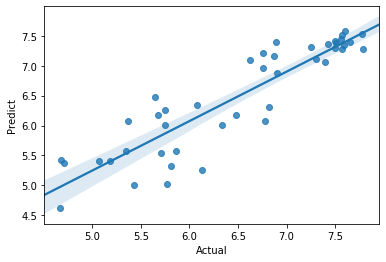

In [76]:
sns.regplot(x='Actual',y='Predict',data=result_lm2)

### Errors rate calculation

We wanted to verify the accuracy of our predictions by calculating the **mean absolute error** the **mean squared error** and also the **root-mean-squared deviation**

In [77]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

MAE: 0.34715958960569104
MSE: 0.17235924883757367
RMSE: 0.41516171407967484


We can clearly see that this **linear regression** method with the `new features added` has generated less error than the previous one.

## Random Forest Regression

We also decided to do a **random forest regression** and we'll try to see which method has the best accuracy with the predictions.

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X2_train,y2_train)
y2_pred = rf.predict(X2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



## Difference between predictions and actual results

In [79]:
result_rf2 = pd.DataFrame({
    'Actual':y2_test,
    'Predict':y2_pred
})
result_rf2['Diff'] = y2_test - y2_pred
result_rf2.head()

,Actual,Predict,Diff
43,7.393264,7.408931,-0.015667
177,5.649675,6.532152,-0.882477
194,4.709502,5.328280,-0.618778
211,6.125724,5.878793,0.246931
126,5.746132,5.531102,0.215030


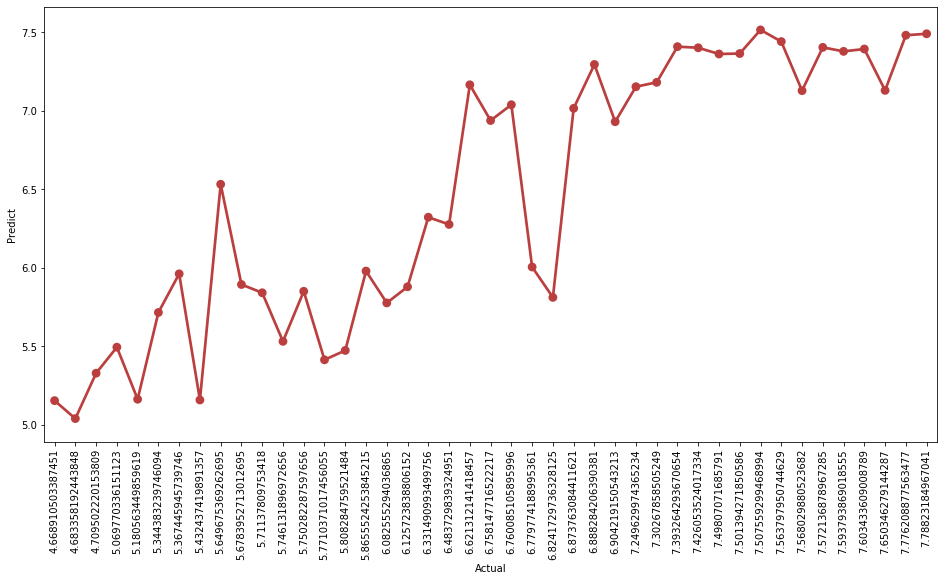

In [80]:
plt.figure (figsize = (16, 8))
sns.pointplot(x='Actual',y='Predict',data=result_rf2, dodge = True, color="#bb3f3f")
plt.xticks(rotation = 90)
plt.show()

### Errors rate calculation

We wanted to verify the accuracy of our predictions by calculating the **mean absolute error** the **mean squared error** and also the **root-mean-squared deviation**

In [81]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y2_test, y2_pred))
print('MSE:', metrics.mean_squared_error(y2_test, y2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

MAE: 0.28907034526499675
MSE: 0.13703904950747833
RMSE: 0.37018785705027973


We can see here that **random forest regression** method with the `new features added` has generated less error than __all the previous regression predictions__.

# Decision Tree Regression model



In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [83]:
df_WHR.head()

,Country,Year,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,Asia-Pacific
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,Asia-Pacific
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,Asia-Pacific
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,Asia-Pacific
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,Asia-Pacific


In [0]:
X_DT = df_WHR.drop(['Happiness score', 'Country', 'Year', 'Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','Region' ], axis=1)
y_DT = df_WHR['Happiness score']

In [85]:
X_DT.head()

,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084
1,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025
2,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078


In [86]:
print(y_DT)

0       3.723590
1       4.401778
2       4.758381
3       3.831719
4       3.782938
          ...   
1698    4.690188
1699    4.184451
1700    3.703191
1701    3.735400
1702    3.638300
Name: Happiness score, Length: 1317, dtype: float64


In [0]:
from sklearn.model_selection import train_test_split
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DT, y_DT, test_size=0.2, random_state=72)

In [88]:
#import the regressor
from sklearn.tree import DecisionTreeRegressor
#create a regressor object
DTregressor = DecisionTreeRegressor(random_state=72)
#fit the regressor with X and Y data
DTregressor.fit(X_DT_train, y_DT_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=72, splitter='best')

In [0]:
from sklearn.tree import export_graphviz
import pydotplus

export_graphviz(DTregressor, out_file='reg_tree.dot')

In [90]:
#predicting a new value

#test the output with X_test
y_pred_DTregressor = DTregressor.predict(X_DT_test)

#print of the predicted happiness score
print ("Predicted happiness score : ", y_pred_DTregressor)


Predicted happiness score :  [5.07356215 6.94999981 5.87593174 6.68960857 5.1656394  6.26928663
 5.37203979 5.84768391 4.72787094 4.66101265 5.91428375 6.85400438
 4.34583712 4.52145338 4.04456949 5.95936155 5.84768391 3.50766301
 3.66873693 3.9828546  4.31971169 6.57978916 3.35467601 4.83263493
 5.13726187 7.11659098 5.27194405 4.96374273 7.44463587 3.66308594
 5.75275469 5.10382748 3.76830196 4.93856049 4.73936701 3.66308594
 5.24560499 4.68222427 5.71329546 4.81243658 3.79530072 7.30589247
 4.55582952 3.82626843 4.83263493 7.59379387 4.62196207 4.99396229
 5.86479855 6.12575817 5.64283466 4.98564911 6.32067299 5.08285141
 7.15111446 6.83908701 7.26126146 4.93856049 3.92266417 3.63944507
 7.30425787 3.4124825  4.55425692 4.59470677 7.00806475 5.93839598
 4.43084621 6.45211792 6.26928663 4.93856049 7.15801644 6.0070219
 6.32958126 5.9846015  4.34892082 4.54150248 4.34967518 5.27194405
 4.88515043 7.44463587 6.9917593  4.34892082 5.1127286  6.8019309
 3.78293753 3.67627716 5.23869848 5

In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_DTregressor, y_DT_test)

rmse = np.sqrt(mse)
print('MAE:', metrics.mean_absolute_error(y_DT_test, y_pred_DTregressor))
print ("MSE = ", mse)
print ("RMSE = ", rmse)

MAE: 0.3977186923677271
MSE =  0.27649725302080114
RMSE =  0.5258300609710338


Let's visualise the result for our predicted happiness values

In [92]:
#arrange for creating a range of values from min value of X to max value of X
#with a difference of 0.01 between two consecutive values

X_grid = np.arrange(min(X_test), max(X_test), 0.01)

#reshape for reshaping the data into a len(X_grid)*1 array
#i.e to make a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid),1))

#scatter plot for original data
plt.scatter(X_test, y, color='red')

#plot predicted data
plt.plot(X_grid, DTregressor.predict(X_grid), color='blue')

#specify title
plt.title('Happiness score prediction (Decision Tree regression)')

#specify X axis label
plt.xlabel('Actual')

#specify y axis label
plt.ylabel('predicted')

#show the plot
plt.show()

AttributeError: ignored

#Principal Component Analysis (PCA) 

In [93]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

#we will use our main happiness report dataframe
data = df_WHR
#We have to remove these columns
to_drop_var = ['Country','Year', 'Region']
data.drop(to_drop_var, inplace=True, axis=1)
X = data
data

,Happiness score,Economy(GDP per Capita),Social support,Health(Life expectancy at birth),Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600
1,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362
2,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803
3,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942
4,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,4.690188,7.565154,0.799274,50.959999,0.575884,-0.079458,0.830937,0.711885,0.182288,0.527755,-1.026085,-1.526321,1.964805,0.418918
1699,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,2.079248,0.496899
1700,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,2.198865,0.593776
1701,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,2.776363,0.743257


We did a correlation at point __IV__. The most correlated attributes with the happiness score are `Economy` and `Health`

In [95]:
from sklearn.decomposition import PCA
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_pca.shape, X_pca.shape)

pca_df = pd.DataFrame(data = X_pca[:,:2], columns = ['PC 1', 'PC 2'])

pca_df.head()

(1317, 2) (1317, 2)


,PC 1,PC 2
0,4.343309,2.394499
1,3.434983,2.467989
2,3.412277,1.268872
3,4.033849,1.284054
4,3.642694,1.861385


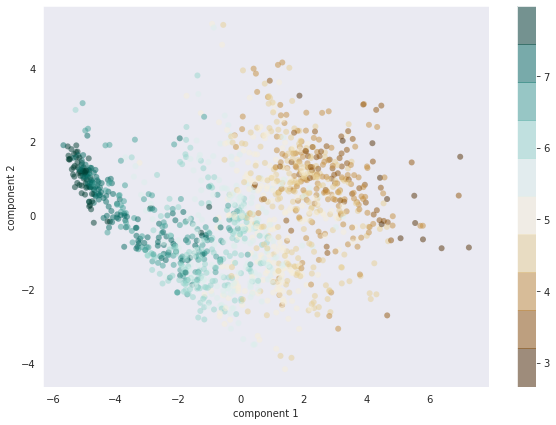

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid()
plt.scatter(pca_df['PC 1'], pca_df['PC 2'],
            c=X['Happiness score'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BrBG',10)
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## **je suis pas sûr si on garde le graph ci-dessus !!!**

TypeError: ignored

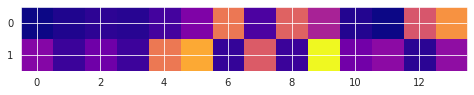

In [97]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(data.columns)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

# fix chopped top/bottom
b, t = plt.ylim(); b += 0; t -= 1; plt.ylim(b, t); plt.show() 

In [98]:
#Clustering libraries
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster #hierarchical
hclust = linkage(X_normalized, method='average')

def llf(id):
    return df_WHR['Country'][id]

plt.figure(figsize=(10, 7))  
dendrogram(hclust,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_label_func=llf,
            leaf_rotation=60.)
plt.show()

KeyError: ignored

<Figure size 720x504 with 0 Axes>